# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import seaborn as sns

In [5]:
fileurl_train = 'https://raw.githubusercontent.com/learn-co-students/dsc-project-eda-with-pandas-ds-alumni/master/train.csv'
df_train = pd.read_csv(fileurl_train)

fileurl_test = 'https://raw.githubusercontent.com/learn-co-students/dsc-project-eda-with-pandas-ds-alumni/master/test.csv'
df_test = pd.read_csv(fileurl_test)


In [ ]:
df_train.head()

In [ ]:
df_train.shape

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [8]:
"""
rows: 333
columns: 15
"""
df.shape

(333, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [36]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

## Exploratory Data Analysis 

In [8]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


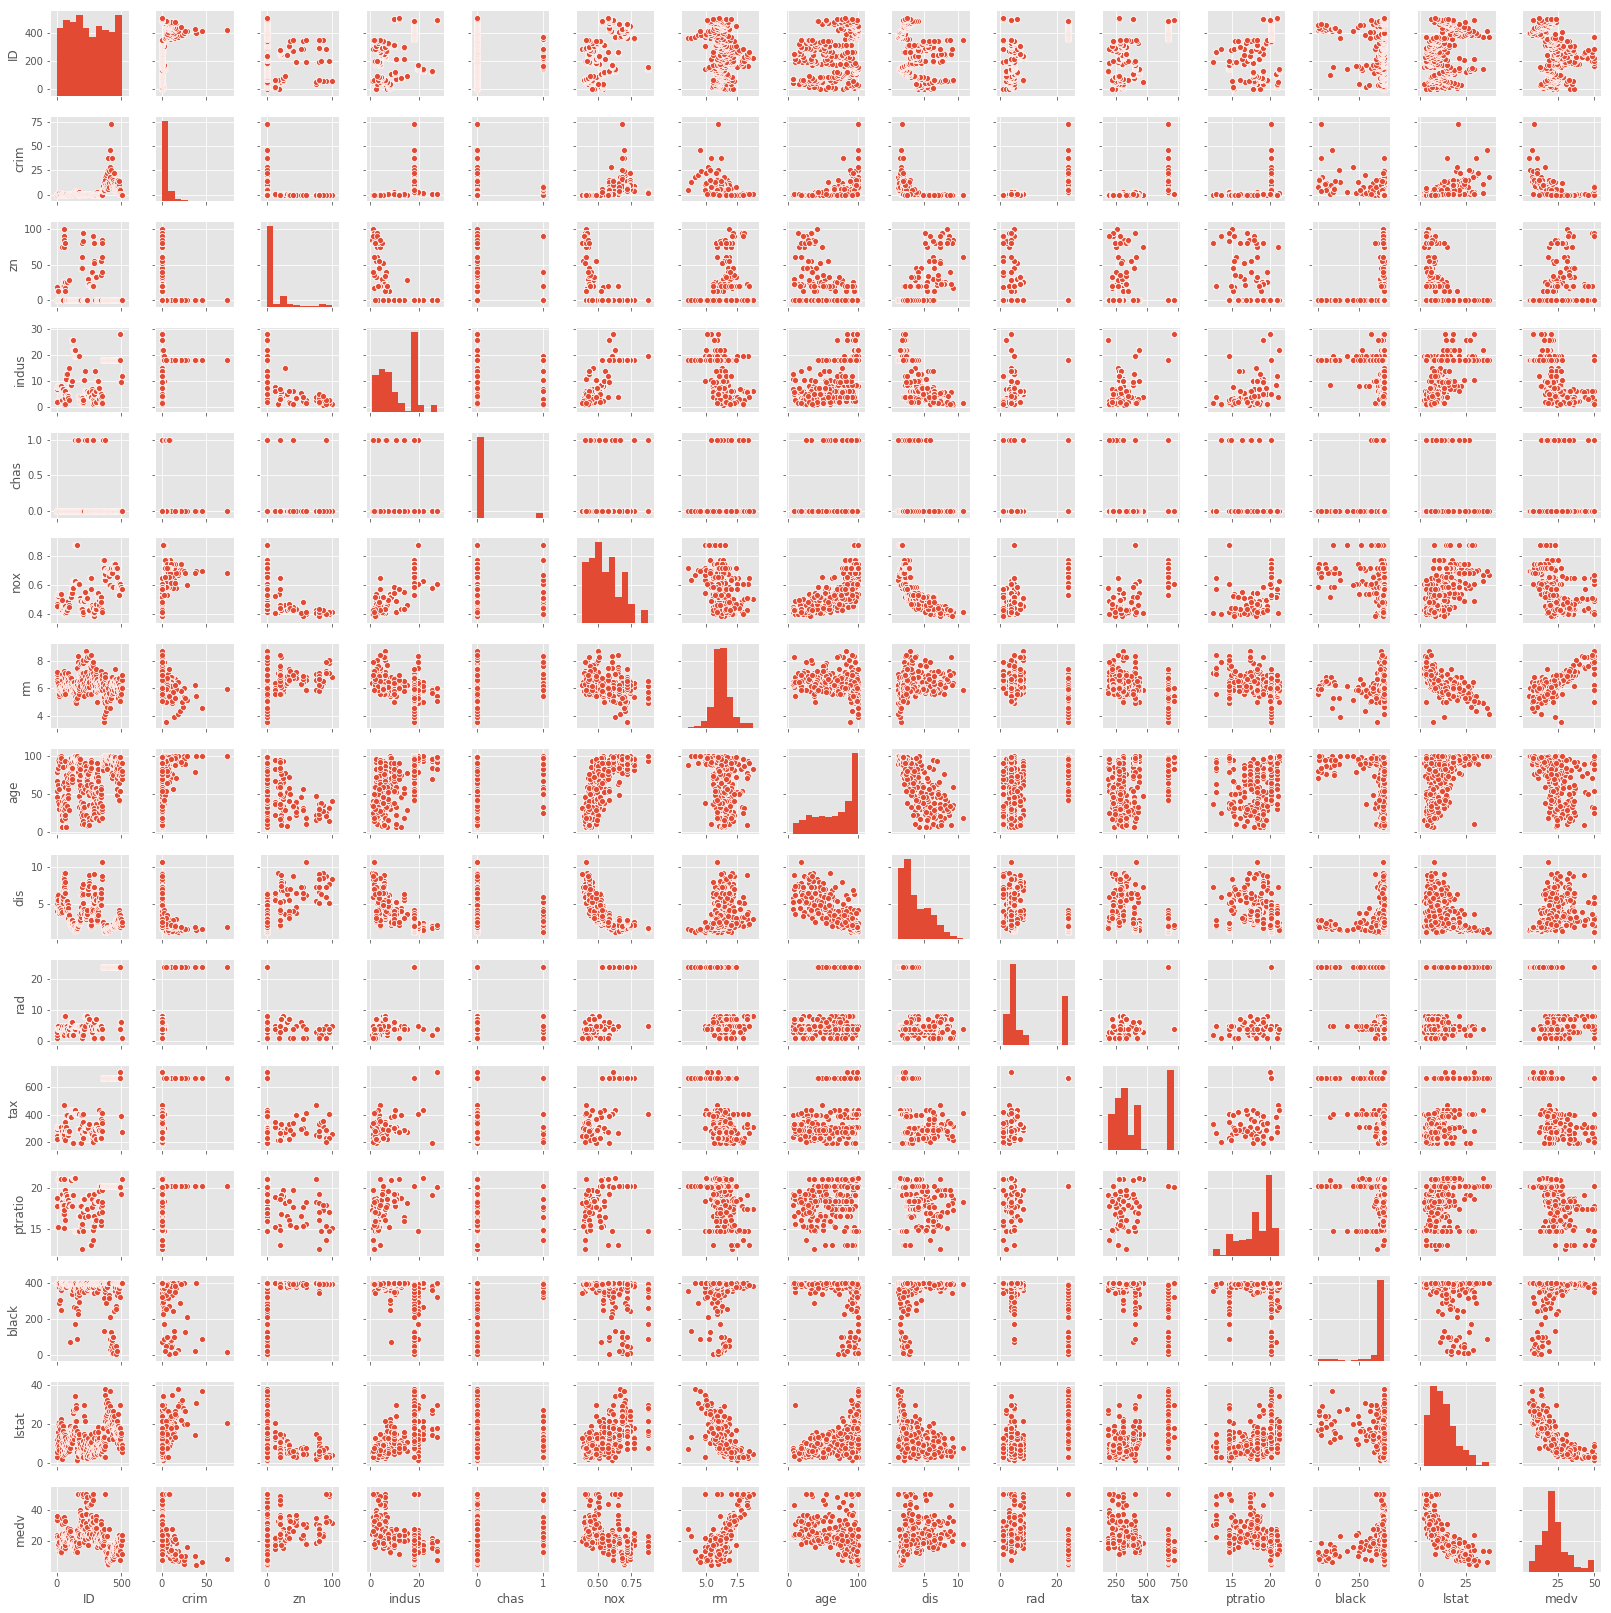

In [18]:
sns.pairplot(df, height=1.5);

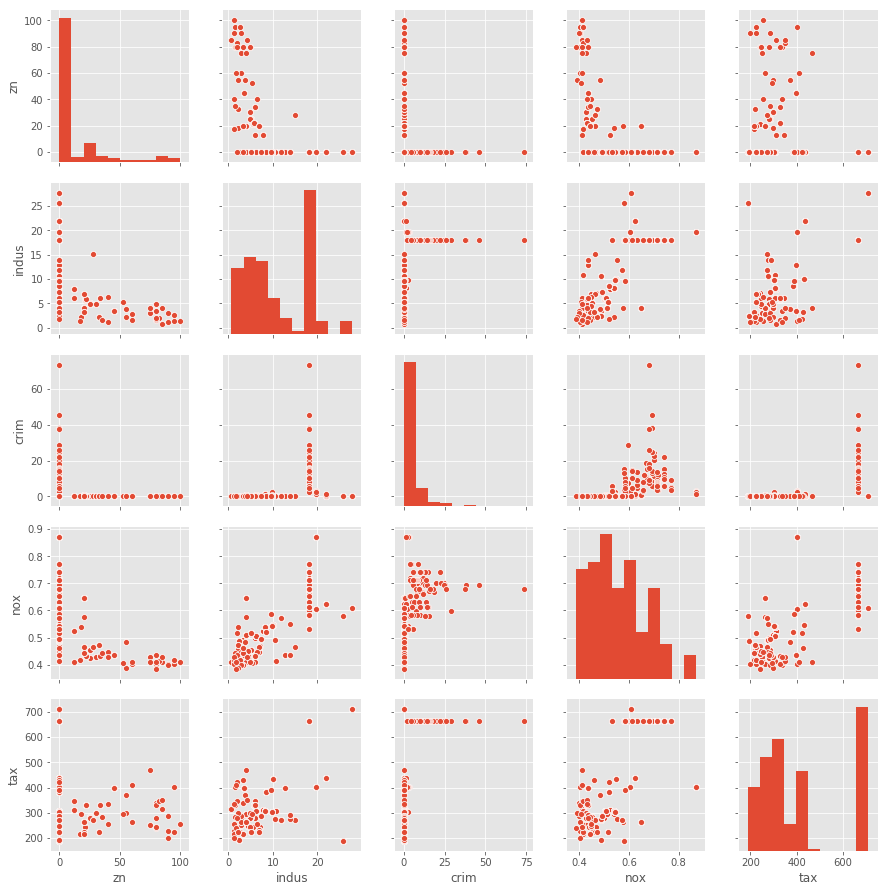

In [8]:
cols = ['zn','indus','crim','nox','tax']
sns.pairplot(df[cols]);

nox represents the nitrogen oxide concentration (parts per 10 million).<br>
indus represents the number of property set aside for industry<br>
The below scatter plot indicates that the larger the number of properties set aside for industry we see an increase in nos.<br> 

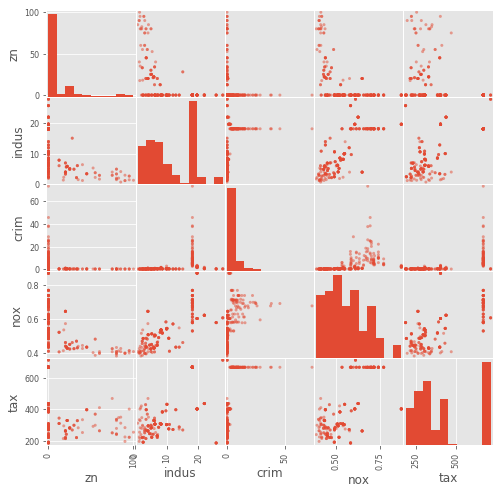

In [9]:
pd.plotting.scatter_matrix(df[cols], figsize=(8,8));

## Correlation Between Each Feature
How do features relate to each other.<br>
The below correlation chart shows that lstat is highly inversely correlated to price.<br>

In [10]:
df.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


The heatmap shows what effects the price of a house.<br>
There is a high correlation between rm and medv.<br>
'tax' and 'medv' are enegatively correlated.<br>
ptratio and medv are inversely correlated.<br>
crim and medv are inversely corealted-prices go down<br>

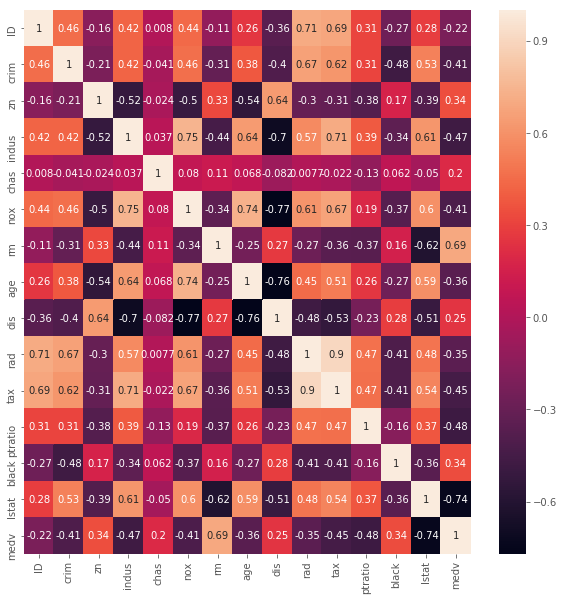

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

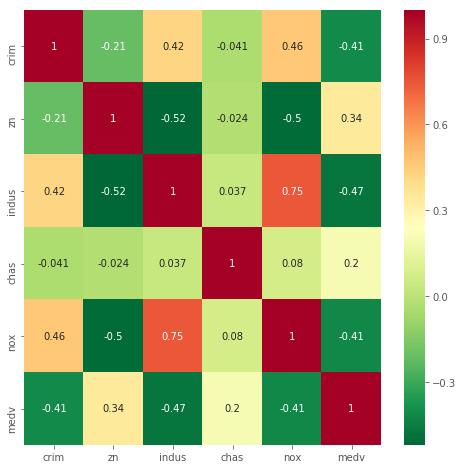

In [4]:
plt.figure(figsize=(8,8))
cols_heat = ['crim','zn','indus','chas','nox','medv']
sns.heatmap(df[cols_heat].corr(), cmap='RdYlGn_r',annot=True);

## Explore Measures of Centrality and Dispersion for 3 Variables
There are three measures of central tendency: the mean, median, and mode. These metrics can give you a general understanding of where data values lie within the range of the whole dataset.<br>

### The 'rm' Column

In [11]:
df['rm'].describe()

count    333.000000
mean       6.265619
std        0.703952
min        3.561000
25%        5.884000
50%        6.202000
75%        6.595000
max        8.725000
Name: rm, dtype: float64

In [10]:
df['rm'].median()

6.202000000000001

For the column 'rm', the below histogram indcates that average number of rooms in a dwelling is around 6.2.<br>
THe distribution of the data looks symetrical because the mean and median are in the middle of the distribution.<br>

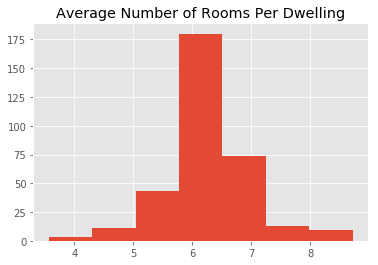

In [8]:
x = df['rm']
plt.hist(x, bins=7)
plt.title("Average Number of Rooms Per Dwelling");

The average number of rooms is around 6.<br>
THe distribution of the data looks symetrical because the mean and median are in the middle of the distribution.<br>

### The 'tax' column
The tax column represents the full-value property-tax rate per $10,000.<br>

In [16]:
df['tax'].describe()

count    333.000000
mean     409.279279
std      170.841988
min      188.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [13]:
import statistics
print('Median {}:'.format(df['tax'].median()))
print('Mode {}:'.format(statistics.mode(df['tax'])))

Median 330.0:
Mode 666:


For the tax column, the histogram indicates that the distribution of the data is positively skewed.
The median is 330 but the mean is 409.
For skewed distribution, the mode and median remain unchanged, but the mean generally moves in the direction of the tails.
The properties with tax rate around 700 are probably outliers. Outliers are extreme or unusual data values that are notably different from the rest of the data.

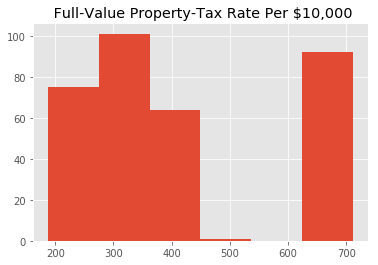

In [15]:
x = df['tax']
plt.hist(x, bins=6)
plt.title(" Full-Value Property-Tax Rate Per $10,000");

### The 'medv' Column
The medv columns represents the median value of owner-occupied homes in $10000s.<br>

In [14]:
df['medv'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [29]:
df['medv'].median()

21.6

In [32]:
mod = df['medv']
statistics.mode(mod)

50.0

The medv data looks normally distributed.<br>
The averge prcie of a home is around 230,000.  The median is around 210,000.<br>

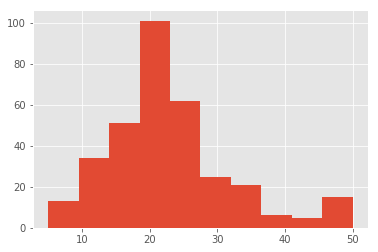

In [27]:
plt.hist(df['medv']);

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


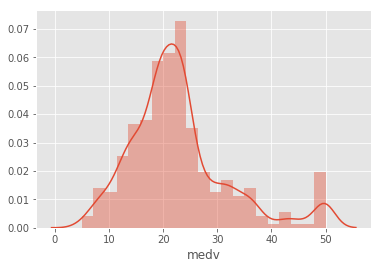

In [17]:
#distribution of the price
#average prcie is around 200,000
#looks normmally distributed

sns.distplot(df['medv']);

## Measures of Dispersion
Measures of Dispersion: absolute deviation, standard deviation, and variance. These measures tell you how tightly (or loosely) your data is clustered around its center.<br>

In [15]:
def get_variance(sample):

    # First, calculate the sample mean
    n = len(sample)
    total = sum(sample)
    sample_mean = total/n
    
    # Now, subtract the sample mean from each point and square the result 
    val_minus_mu_accumulator = 0
    for i in sample:
        val_minus_mu_accumulator += (i - sample_mean)**2
    
    # Divde the total by the number of items in the sample  
    variance = val_minus_mu_accumulator / (n - 1)
    
    return round(variance, 2)

test1 = [1, 2, 3, 5, 5, 4]
print(get_variance(df['tax']))

29186.99


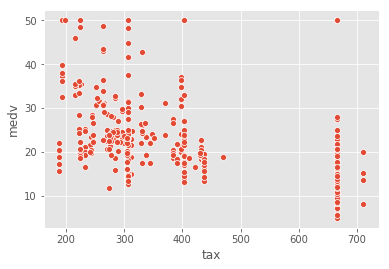

In [27]:
ax = sns.scatterplot(x="tax", y="medv",
                     data=df)

No handles with labels found to put in legend.


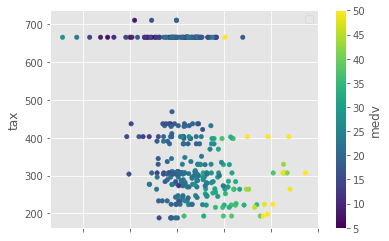

In [24]:
ax2 = df.plot.scatter(x='rm',
                      y='tax',
                       c='medv',
                       colormap='viridis')
ax2.legend()

## Subsets of the data
### Subset of 'chas' column
I subset 'char' column which represents whether a home is either bound by the Charles River or not.  I'm looking for what impact this has on other variables.<br>
However, this really won't be possible because because only 6% of hte homes are located by river.<br> 


In [14]:
df['chas'].value_counts(normalize=True)

0    0.93994
1    0.06006
Name: chas, dtype: float64

In [17]:
# 1 if tract bounds river; 0 otherwise
bound_river_no = df[df['chas']==0]
bound_river_yes = df[df['chas']==1]

Regarding 'rm', the homes that aren't located by the river and located by the river have close to the same number of rooms (6.25 and 6.58, respectively).<br> 

In [36]:
bound_river_no['rm'].describe()

count    313.000000
mean       6.245674
std        0.693026
min        3.561000
25%        5.879000
50%        6.185000
75%        6.563000
max        8.725000
Name: rm, dtype: float64

In [37]:
bound_river_yes['rm'].describe()

count    20.000000
mean      6.577750
std       0.814341
min       5.403000
25%       6.111250
50%       6.322500
75%       6.913250
max       8.375000
Name: rm, dtype: float64

The column 'crim' represents per capita crime rate by town.  I picked the column rate because I wanted to compare crimes rates for towns located by the river and not.<br>
Regarding crime rate, the mean for crime rate in towns not by the river is 3.43 and the mean crime rate for towns by the rivers is lower at 2.163972.  The crime rates for towns by the river is lower.  However, the number of homes located by river is much smaller.<br>

In [39]:
bound_river_no['crim'].describe()

count    313.000000
mean       3.436787
std        7.544289
min        0.006320
25%        0.078750
50%        0.245220
75%        3.678220
max       73.534100
Name: crim, dtype: float64

In [38]:
bound_river_yes['crim'].describe()

count    20.000000
mean      2.163972
std       2.885734
min       0.015010
25%       0.200377
50%       0.572070
75%       3.453213
max       8.982960
Name: crim, dtype: float64

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


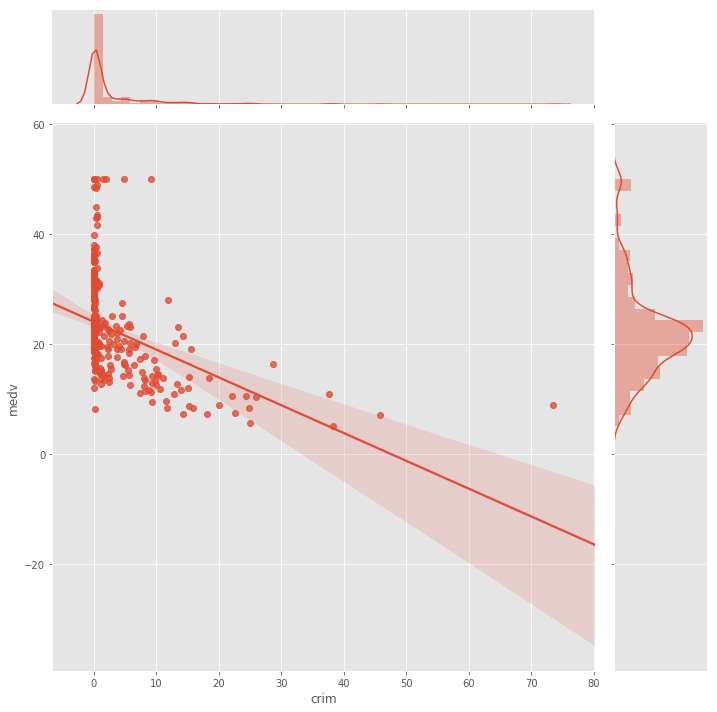

In [19]:
sns.jointplot(bound_river_no['crim'],bound_river_no['medv'], kind='reg', height=10)

Regarding taxes, the mean taxes for towns not lcoated by river was higher than for hte towns located by the river are 410.220 and 394.550, respectively.<br>

In [21]:
bound_river_no['tax'].describe()

count    313.000000
mean     410.220447
std      171.014186
min      188.000000
25%      281.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [20]:
bound_river_yes['tax'].describe()

count     20.000000
mean     394.550000
std      171.795005
min      198.000000
25%      276.750000
50%      307.000000
75%      468.750000
max      666.000000
Name: tax, dtype: float64

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Average Number of Rooms Per Dwelling')

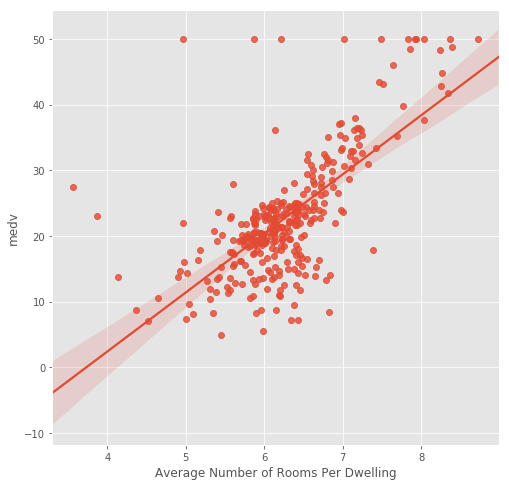

In [11]:
plt.figure(figsize=(8,8))
sns.regplot(df['rm'],df['medv']);
plt.xlabel('Average Number of Rooms Per Dwelling')

### Subset of 'medv' Column 
I subset this column because I wanted to see the number of homes that would be considered in the low and medium and high prices ranges.<br>
I created these three categroeis based on the information provided by utilixing the describe function.<br>

In [4]:
df_amend = df.copy()

In [5]:
df_amend['medv'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [6]:
def price_range(text):
    text = str(text)
    for price in text:
        if price <= '18':
            return 'low'
        elif price <= '22':
            return 'medium'
        else:
            return 'high'

df_amend['price_range'] = df_amend['medv'].map(price_range)

In [7]:
df_amend.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,price_range
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,medium
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,medium
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,high
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,high
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,medium


There 140 homes in the medium price range, around 70 homes in the high price range.

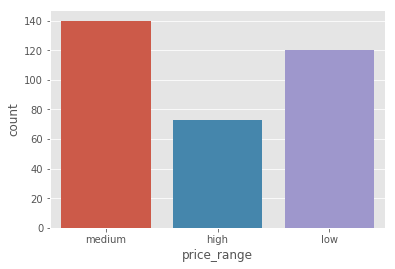

In [10]:
sns.countplot(data=df_amend, x='price_range');

In [22]:
df_amend.groupby("rm")['medv'].mean()

rm
3.561    27.5
3.863    23.1
4.138    13.8
4.368     8.8
4.519     7.0
4.652    10.5
4.906    13.8
4.926    14.6
4.963    21.9
4.970    50.0
4.973    16.1
5.000     7.4
5.019    14.4
5.036     9.7
5.093     8.1
5.155    16.3
5.186    17.8
5.272    13.1
5.304    11.2
5.349     8.3
5.362    20.8
5.390    11.5
5.403    13.4
5.404    19.3
5.412    23.7
5.427    13.8
5.453     5.0
5.454    15.2
5.456    20.2
5.520    12.3
         ... 
7.163    31.6
7.178    36.4
7.185    34.9
7.203    33.8
7.206    36.5
7.236    36.1
7.241    32.7
7.249    35.4
7.327    31.0
7.393    17.8
7.420    33.4
7.470    43.5
7.489    50.0
7.520    43.1
7.645    46.0
7.691    35.2
7.765    39.8
7.831    50.0
7.853    48.5
7.923    50.0
7.929    50.0
8.034    50.0
8.040    37.6
8.247    48.3
8.259    42.8
8.266    44.8
8.337    41.7
8.375    50.0
8.398    48.8
8.725    50.0
Name: medv, Length: 308, dtype: float64

In [32]:
high_price = df_amend[df_amend['price_range']== 'high']
med_price = df_amend[df_amend['price_range']== 'medium']
low_price = df_amend[df_amend['price_range']== 'low']

In [33]:
low_price.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,price_range
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,low
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,low
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2,low
10,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,low
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6,low


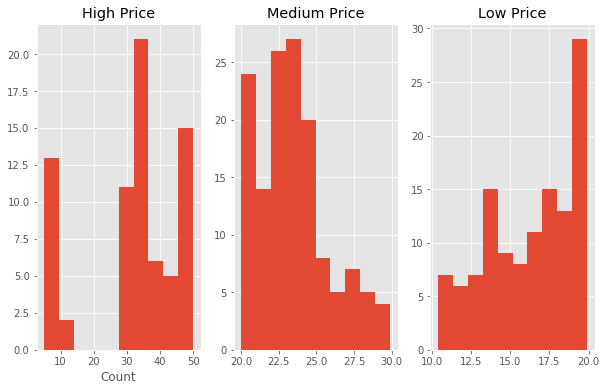

In [38]:
#df_amend.groupby('price_range').plot(x='rm', y='medv')
#fig, (ax1, ax2,ax3) = plt.subplots(1,2,3, figsize=(10,4))
list1 = high_price['medv']
list2 = med_price['medv']
list3 = low_price['medv']

plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.hist(list1)
plt.title('High Price')
plt.xlabel('Home Price')
plt.xlabel('Count')
plt.subplot(1, 3, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.hist(list2)
plt.title('Medium Price')
plt.subplot(1, 3, 3)  # 1 line, 2 rows, index nr 2 (third position in the subplot)
plt.hist(list3)
plt.title('Low Price')
plt.show()

Are they outliers in medv?<br>
It appears that there are outliers below the 10 count and around the 35 count.<br>
The above chart shows a different between data in the 10 count area 40 to 50 count.<br>

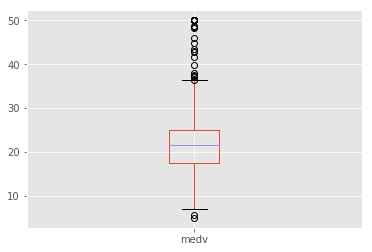

In [9]:
df_amend['medv'].plot.box();

### Example Central Tendency and Dispersions

In [3]:
price = df['medv']

In [4]:
len(price)

333

In [5]:
price.head()

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: medv, dtype: float64

In [6]:
price.describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

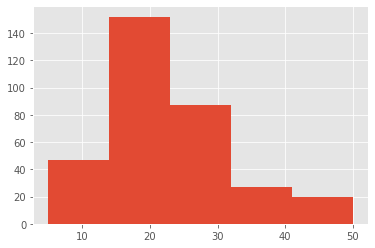

In [10]:
plt.hist(price, bins=5);

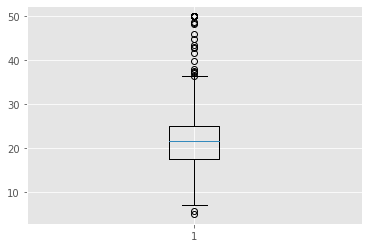

In [15]:
plt.boxplot(price);

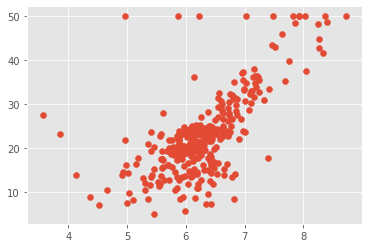

In [21]:
plt.scatter(df['rm'],df['medv']);

In [7]:
#mean
def get_mean(data):
    count = 0
    for i in data:
        count += i
    mean = round(count / len(data), 2)
    
    return mean
        #return round(mean,2)

mean_price = get_mean(price)
print('Sample mean:{}'.format(mean_price))

Sample mean:22.77


In [8]:
#without outliers
def filter_list(listA):
    listB = []
    for l in listA:
        if l > 35:
            listB.append(l)
    return listB

price_less_35 = filter_list(price)

In [9]:
print(price_less_35)

[36.2, 35.4, 50.0, 50.0, 50.0, 37.2, 39.8, 36.2, 37.9, 50.0, 37.0, 36.4, 48.5, 50.0, 44.8, 50.0, 37.6, 41.7, 48.3, 42.8, 43.1, 48.8, 36.5, 43.5, 35.2, 35.1, 35.4, 46.0, 50.0, 36.1, 50.0, 50.0, 50.0, 50.0]


In [10]:
def get_mean(data):
    count = 0
    for i in data:
        count += i
    mean = round(count / len(data), 2)
    
    return mean
        #return round(mean,2)

mean_price = get_mean(price_less_35)
print('Sample mean:{}'.format(mean_price))

Sample mean:43.22


In [14]:
#median
def get_median(data):

    data_sorted = sorted(data)

    if len(data_sorted) % 2 == 0:
        val1_index = int((len(data_sorted) / 2) - 1)
        val2_index = val1_index + 1
        return (data_sorted[val1_index] + data_sorted[val2_index]) / 2

    else:
        med_index = (len(data_sorted) // 2) 
        return data_sorted[med_index]

get_median(price)

21.6

In [16]:
#mode
def get_mode(data):

    # Create and populate frequency distribution
    frequency_dict = {}
    
    # If an element is not in the dictionary , add it with value 1
    # If an element is already in the dictionary , +1 the value
    for i in data:
        if i not in frequency_dict:
            frequency_dict[i] = 1
        else:
            frequency_dict[i] += 1
    
    # Create alist for mode values
    modes = []
    
    #from the dictionary, add element(s) to the modes list with max frequency
    highest_freq = max(frequency_dict.values())
    for key, val in frequency_dict.items():
        if val == highest_freq:
            modes.append(key)
    # Return the mode list 
    return modes

print(get_mode(price)) 


[50.0]


In [17]:
#Variance
def get_variance(sample):

    # First, calculate the sample mean
    n = len(sample)
    total = sum(sample)
    sample_mean = total/n
    
    # Now, subtract the sample mean from each point and square the result 
    val_minus_mu_accumulator = 0
    for i in sample:
        val_minus_mu_accumulator += (i - sample_mean)**2
    
    # Divde the total by the number of items in the sample  
    variance = val_minus_mu_accumulator / (n - 1)
    
    return round(variance, 2)

#print(get_variance(test1)) #

get_variance(price)

84.15

In [19]:
#standard Deviation
from math import sqrt

def get_stddev(list):
    
    stddev = sqrt(get_variance(list))
    
    return round(stddev, 2) 



#print (get_stddev(test))
get_stddev(price)

9.17

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!